In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
from scipy import stats, optimize

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

1  分别画出gamma分布（参数取alpha=1、beta=2）、Chi2分布（自由度10）的pdf、cdf、sf多图，要求

- (1) ppf 从1%到99%的自变量区间
- (2) 给出各曲线的标注
- (3) 生成1000个样本点的分箱图，随机种子取 201812

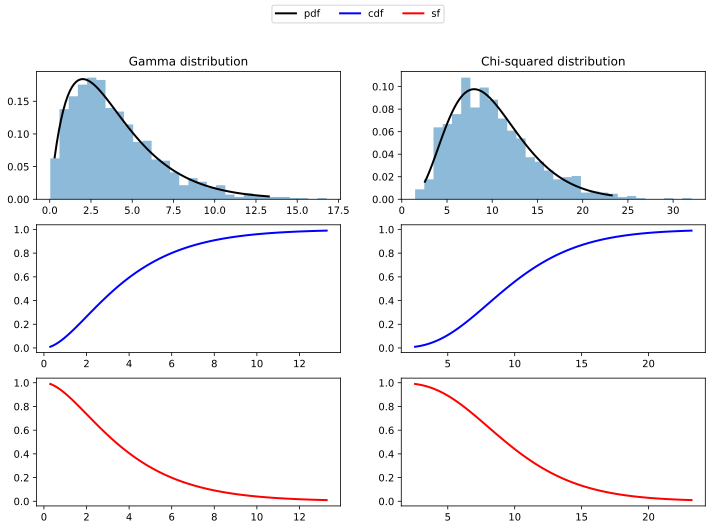

In [41]:
# 题 1 解答
rv_1 = stats.gamma(2, scale = 2)
rv_2 = stats.chi2(10)

x = np.linspace(rv_1.ppf(0.01), rv_1.ppf(0.99), 100)
y = np.linspace(rv_2.ppf(0.01), rv_2.ppf(0.99), 100)

fig, ax = plt.subplots(3, 2, figsize = (12, 8), dpi = 1000)
ax[0][0].set_title("Gamma distribution")
ax[0][1].set_title("Chi-squared distribution")
ax[0][0].plot(x, rv_1.pdf(x),    'k-', lw=2, label='pdf')
ax[1][0].plot(x, rv_1.cdf(x),    'b-', lw=2, label='cdf')
ax[2][0].plot(x, rv_1.sf(x),     'r-', lw=2, label='sf')
ax[0][1].plot(y, rv_2.pdf(y),    'k-', lw=2)
ax[1][1].plot(y, rv_2.cdf(y),    'b-', lw=2)
ax[2][1].plot(y, rv_2.sf(y),     'r-', lw=2)

np.random.seed(201812)
x, y = rv_1.rvs(size = 1000), rv_2.rvs(size = 1000)
ax[0][0].hist(x, bins=30, density = True, histtype='stepfilled', alpha=0.5)
ax[0][1].hist(y, bins=30, density = True, histtype='stepfilled', alpha=0.5)

fig.legend(loc='upper center',ncol=3,fancybox=True,shadow=False)
plt.show()

2  拟合指数衰减曲线 $$y(t)=Ae^{\lambda t}\sin(\omega t + \phi)$$
其中

- 时间变化范围是 $0\le t\le 10$，取等间隔的 1001 个数据点
- $A=3$、$\lambda=-0.2$、$\omega=2\pi$ 和 $\phi=0.1\pi$ 是已有目标值的参数
- 目标函数式中加入 0.5 倍标准正态分布噪音（随机种子 201812）得到 $y$ 数组

试拟合出 $A$、$\lambda$、$\omega$ 和 $\phi$，它们的初始试探值分别取为 2.8、-0.22、6 和 0.35。

[ 2.85327041 -0.18495296  6.29123627  0.26061432]


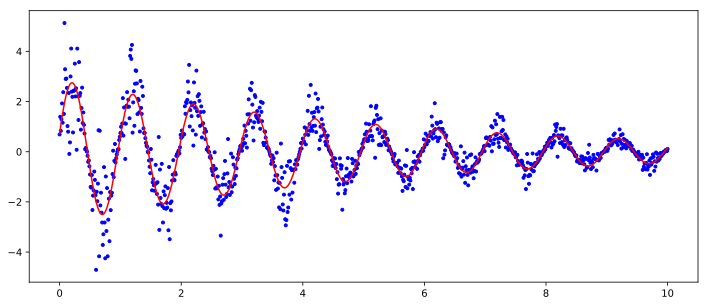

In [86]:
# 题 2 解答
np.random.seed(201812)
t_data = np.linspace(0, 10, 1001)
y_data = 3 * np.exp(-0.2 * t_data) * np.sin((2 *  t_data + 0.1 ) * np.pi) *(1 +  0.5 * np.random.normal(size=1001))

def test_func(x, A, _lambda, omega, phi):
    return A * np.exp(_lambda * x) * np.sin(omega *  x + phi)

params, params_covariance = optimize.curve_fit(test_func, x_data, y_data, p0=[2.8, -0.22, 6, 0.35])
A0, lambda0, omega0, phi0 = params
print(params)

plt.figure(figsize = (12, 5), dpi = 1000)
plt.plot(x_data, y_data, ".b")
plt.plot(t_data, test_func(x_data, A0, lambda0, omega0, phi0), "-r")
plt.show()